# **DATA VISUALIZATION AND EXPLORATION - GIS**



Please reach out if you have any questions

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files

In [4]:
uploaded = files.upload()

Saving data_clean.csv to data_clean (1).csv


In [3]:
df = pd.read_csv("data_clean.csv")

### **Data Clean Review**

In [4]:
# impute the missing values and create the missing value indicator variables for each numeric column.
# Did with for loops and if statement
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: Price
imputing missing values for: Distance
imputing missing values for: Postcode
imputing missing values for: Bedroom2
imputing missing values for: Bathroom
imputing missing values for: Car
imputing missing values for: Landsize
imputing missing values for: BuildingArea
imputing missing values for: YearBuilt
imputing missing values for: Lattitude
imputing missing values for: Longtitude
imputing missing values for: Propertycount


In [5]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

imputing missing values for: CouncilArea
imputing missing values for: Regionname


In [6]:
df = df.drop(['Price_ismissing', 'Distance_ismissing', 'Postcode_ismissing', 'Bedroom2_ismissing','Bathroom_ismissing', 'Car_ismissing', 'Landsize_ismissing', 'BuildingArea_ismissing', 'YearBuilt_ismissing', 'Lattitude_ismissing', 'Longtitude_ismissing', 'Propertycount_ismissing', 'CouncilArea_ismissing', 'Regionname_ismissing'], axis=1)

In [7]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

## **Visualization Libraries Imported and Basic Plots**
https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head()

Suburb             Address  ...             Regionname Propertycount
0  Abbotsford       68 Studley St  ...  Northern Metropolitan        4019.0
1  Abbotsford        85 Turner St  ...  Northern Metropolitan        4019.0
2  Abbotsford     25 Bloomburg St  ...  Northern Metropolitan        4019.0
3  Abbotsford  18/659 Victoria St  ...  Northern Metropolitan        4019.0
4  Abbotsford        5 Charles St  ...  Northern Metropolitan        4019.0

[5 rows x 21 columns]

**MatplotLib**

Text(0, 0.5, 'Price')

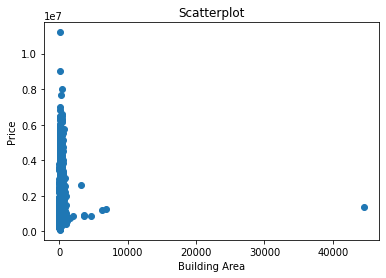

In [ ]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(df['BuildingArea'], df['Price'])
# set a title and labels
ax.set_title('Scatterplot')
ax.set_xlabel('Building Area')
ax.set_ylabel('Price')

Text(0, 0.5, 'Frequency')

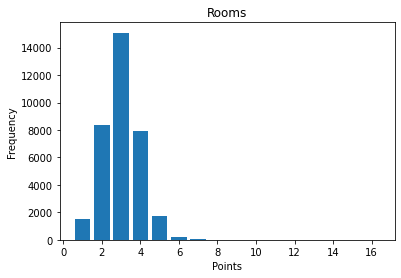

In [ ]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = df['Rooms'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Rooms') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

**Pandas**

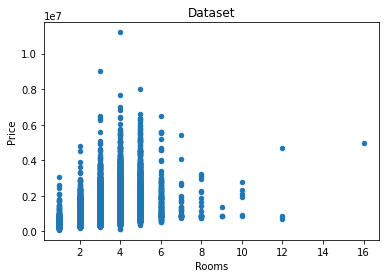

In [ ]:
df.plot.scatter(x='Rooms', y='Price', title='Dataset')

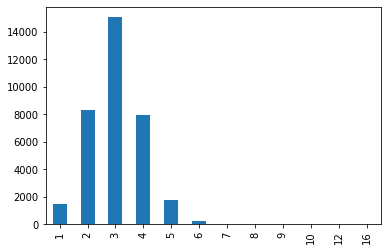

In [ ]:
df['Rooms'].value_counts().sort_index().plot.bar()

**Seaborn**

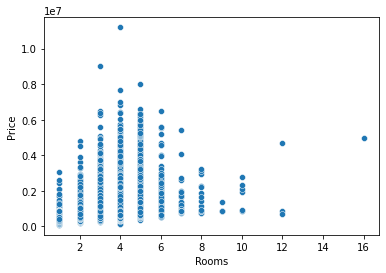

In [ ]:
sns.scatterplot(x='Rooms', y='Price', data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


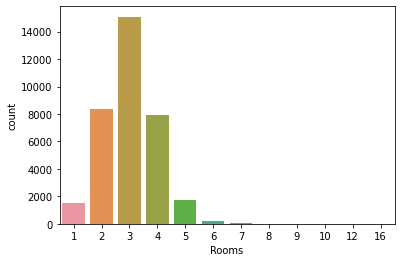

In [ ]:
sns.countplot(df['Rooms'])

## **Visualizations For This DataSet**
https://datavizcatalogue.com/index.html

When you do a DS project or a data visualization project, you must understand that there are specific variables that you are looking at to create visualizations with them. This typically includes your target variable along with other features. 

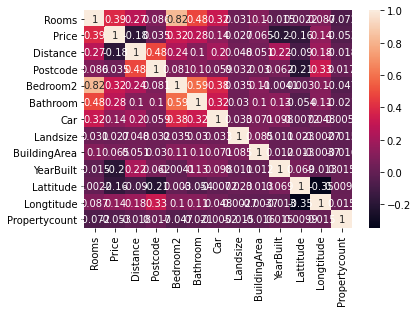

In [ ]:
corr = df.corr(method='pearson')
sns.heatmap(corr, annot = True) 
# TOO SMALL

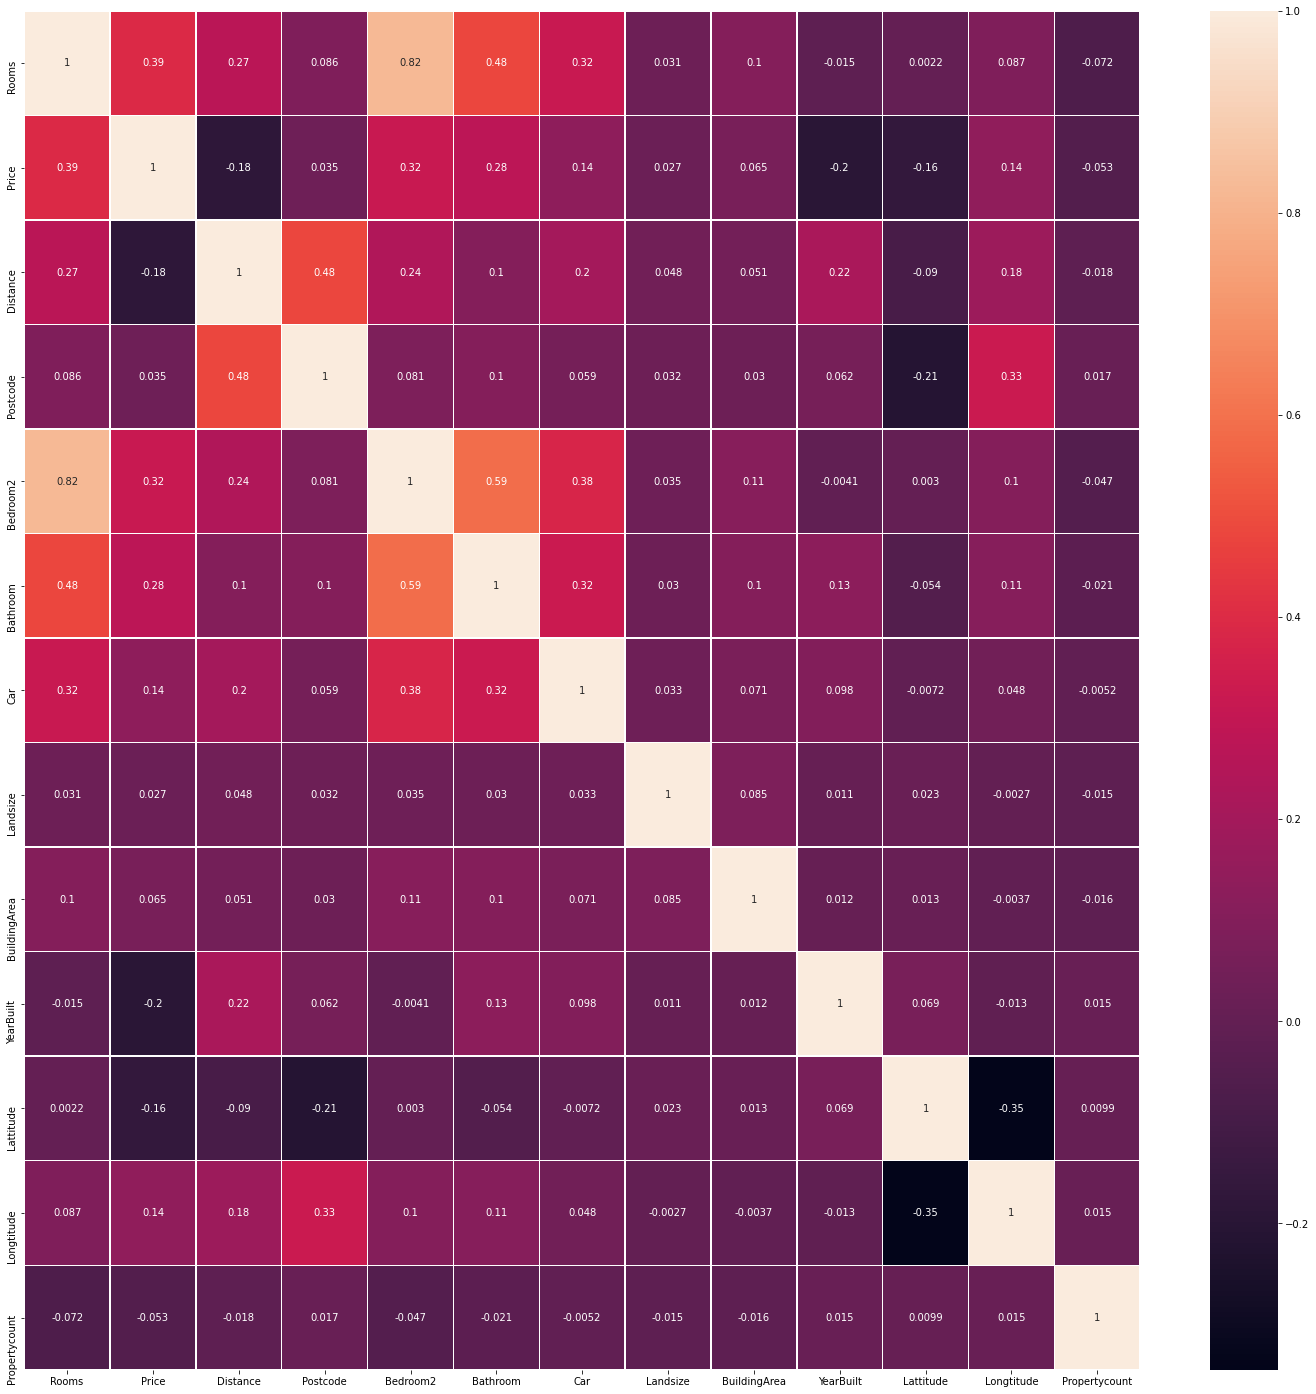

In [ ]:
fig, ax = plt.subplots(figsize=(25,25))  
sns.heatmap(corr, annot = True, linewidths=.5, ax=ax) 

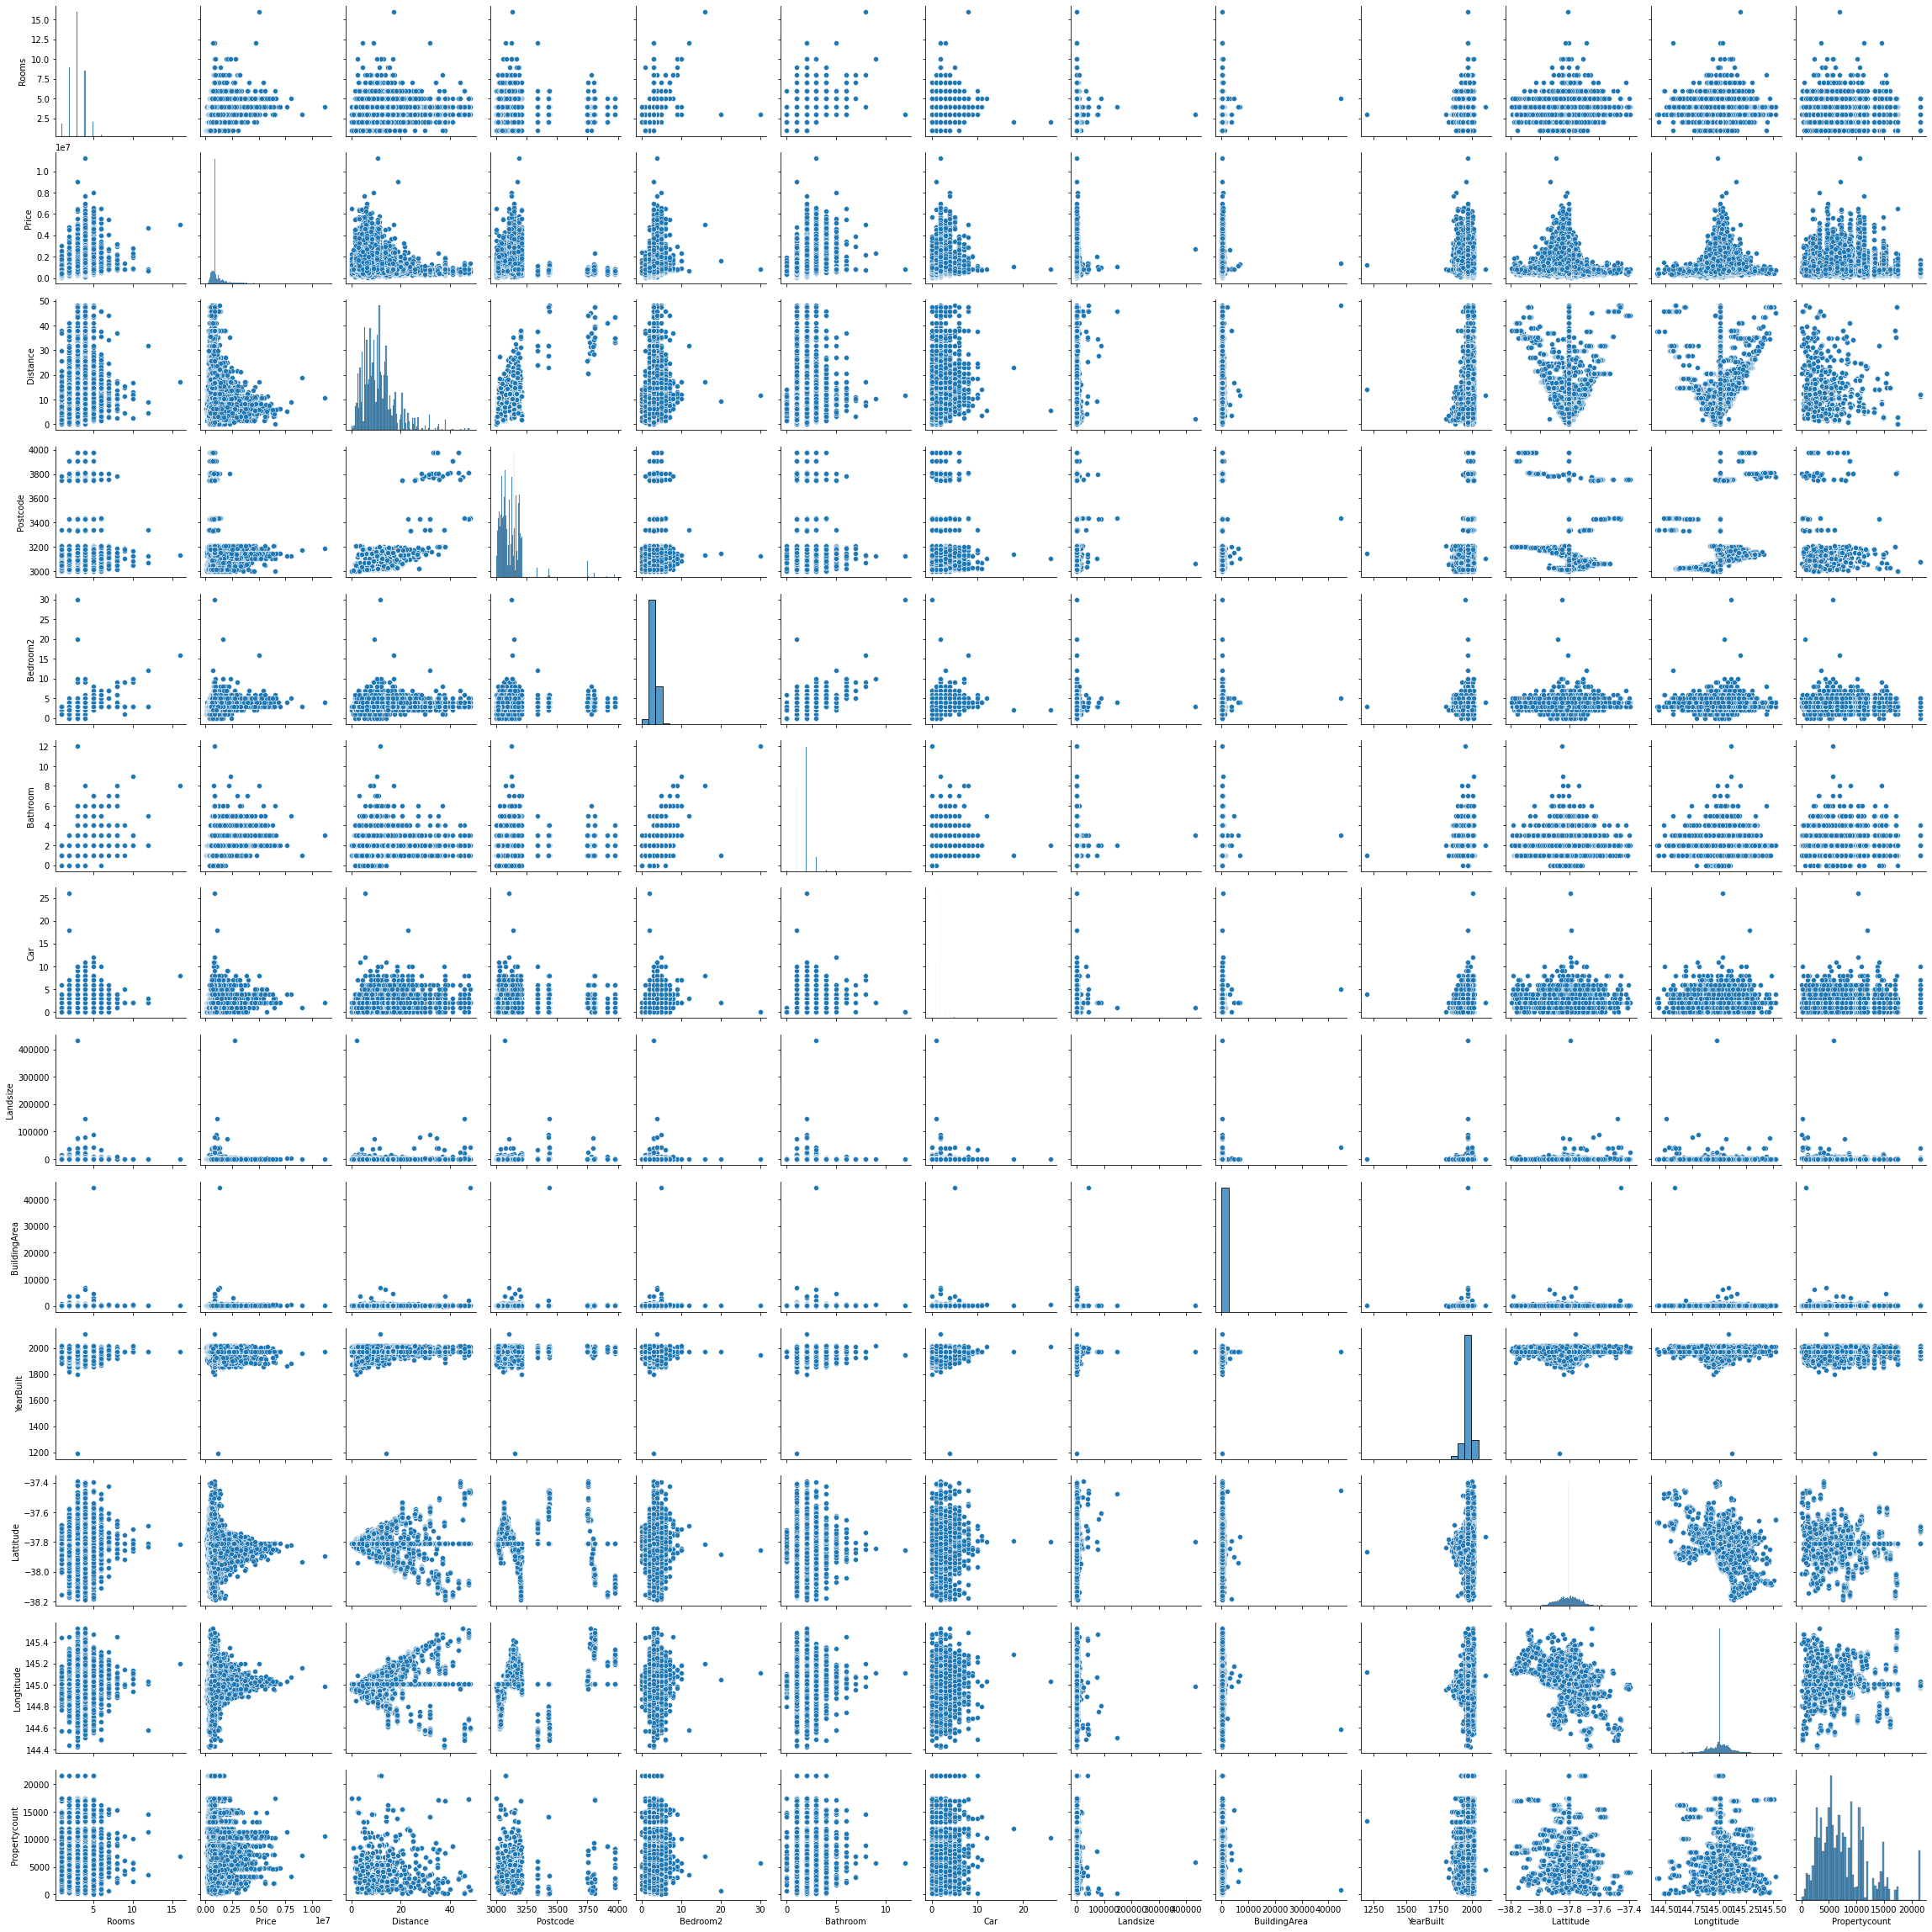

In [ ]:
sns.pairplot(df) #  plot a grid of pairwise relationships in a dataset

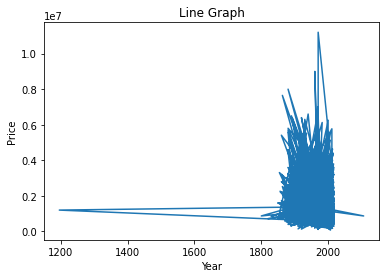

In [ ]:
plt.plot(df['YearBuilt'],df['Price'])
plt.title('Line Graph')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [27]:
# !pip install geopandas

     |████████████████████████████████| 972kB 6.1MB/s 
     |████████████████████████████████| 14.8MB 319kB/s 
     |████████████████████████████████| 6.5MB 23.2MB/s 


In [44]:
# Advanced Visuals 
import geopandas
import plotly.express as px
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
fig = px.scatter_mapbox(df,
                        lat='Lattitude',
                        lon='Longtitude',
                        hover_name='Suburb',
                        color="Price",
                        zoom=10.5,
                        hover_data=['YearBuilt', 'Car'],
                        height=500)


fig.update_layout(mapbox_style="carto-darkmatter")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

## **Practice**
Create two data visualizations by conducting your own research with matplotlib, seaborn, or pandas that would best fit this Dataset

In [ ]:
# Visual 1

In [ ]:
# Visual 2

# **Data Exploration**

In [45]:
df.describe() # Statistical Summary

Rooms         Price  ...    Longtitude  Propertycount
count  34857.000000  3.485700e+04  ...  34857.000000   34857.000000
mean       3.031012  1.010838e+06  ...    145.003212    7572.818602
std        0.969933  5.719992e+05  ...      0.105558    4427.906124
min        1.000000  8.500000e+04  ...    144.423790      83.000000
25%        2.000000  6.950000e+05  ...    144.964400    4385.000000
50%        3.000000  8.700000e+05  ...    145.007800    6763.000000
75%        4.000000  1.150000e+06  ...    145.051750   10412.000000
max       16.000000  1.120000e+07  ...    145.526350   21650.000000

[8 rows x 13 columns]

In [46]:
df.shape

(34857, 21)

In [47]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



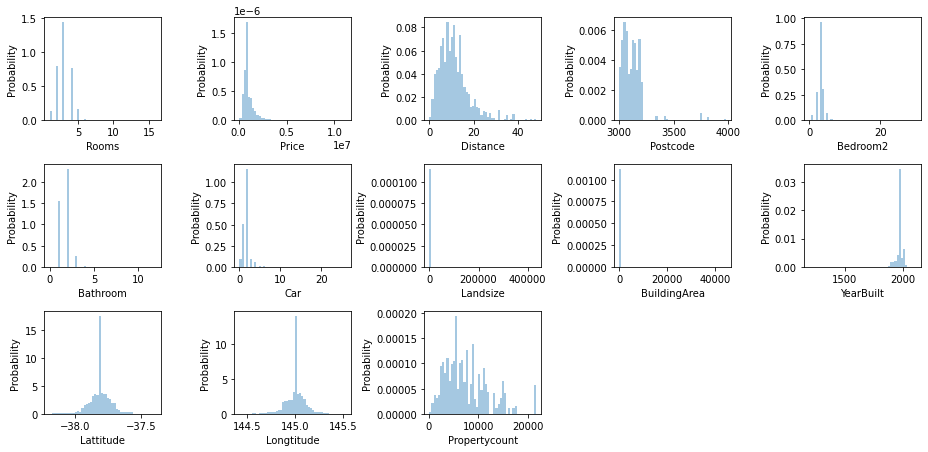

In [48]:
# Marginal distributions of variables: https://seaborn.pydata.org/generated/seaborn.distplot.html
plt.figure(figsize = (13,8))
for i, name in enumerate(numeric_cols):
    plt.subplot(4,5,i+1);
    sns.distplot(df.loc[:,name], kde = False, norm_hist = True)
    plt.ylabel('Probability')
plt.tight_layout()

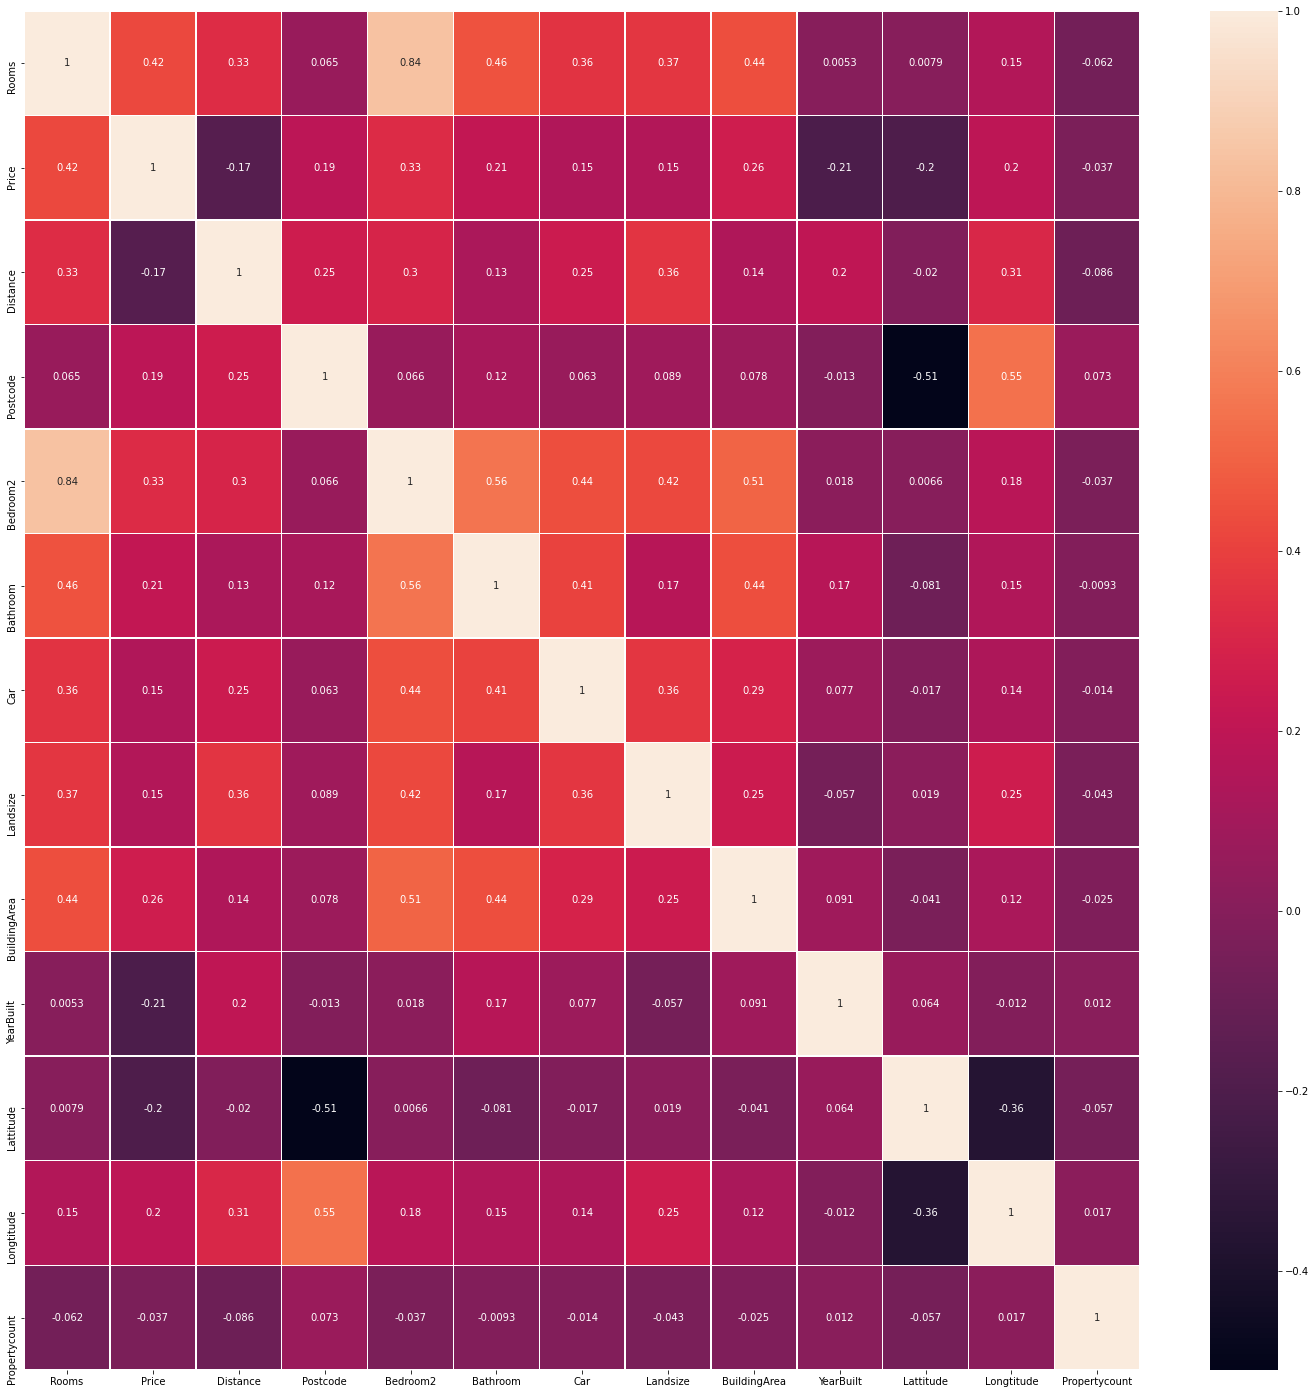

In [49]:
corr = df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(25,25))  
sns.heatmap(corr, annot = True, linewidths=.5, ax=ax) 

## **Practice**
Do one Univariate and one Bivariate analysis plots
https://medium.com/@purnasaigudikandula/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751

In [31]:
# Univariate

In [32]:
# Bivariate

## **Feature Selection**
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

In [8]:
# Check type of predictor feature
print('Name and type of varialbes are: \n')
print(df.dtypes)
print('\nThe number of variables is %d' %len(df.columns))
print('...The number of categorical variables is %d' %(df.shape[1] - sum(df.dtypes=='float64') - sum(df.dtypes=='int64'))) # <- Count object type (Categorical variable) 
print('...The number of continuous variable is %d' %(sum(df.dtypes=='float64') + sum(df.dtypes=='int64'))) # <- Count float type (Continuos variable)

list_predictor_continuous = []
list_predictor_categorical = []

for name in df.columns[3:]:
    if df[name].dtype == 'float64' or df[name].dtype == 'int64':
        list_predictor_continuous.append(name)
    else:
        list_predictor_categorical.append(name)

print('List of continuous predictor:')
print(list_predictor_continuous)
print('List of categorical predictor:')
print(list_predictor_categorical)

Name and type of varialbes are: 

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

The number of variables is 21
...The number of categorical variables is 8
...The number of continuous variable is 13
List of continuous predictor:
['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
List of categorical predictor:
['Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


In [9]:
features_num = ['Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
features_cat = ['Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']

In [10]:
X_n = df[features_num]
y = df['Price']

In [13]:
# Statistical Based for Numerical

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# define feature selection
fs = SelectKBest(score_func=f_regression, k=4)
# apply feature selection
X_selected = fs.fit_transform(X_n, y)
print(X_selected.shape)

(34857, 4)


In [14]:
fs_support = fs.get_support()
fs_feature = X_n.loc[:,fs_support].columns.tolist()
print(str(fs_feature), 'selected features')

['Distance', 'Bedroom2', 'Bathroom', 'YearBuilt'] selected features


In [11]:
# Categorical Feature Selection with SelectKBest

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder

Rredictor_Categorical = df[features_cat].values
# Integer Encoding for Categorical variable
enc_pred = OrdinalEncoder() # <- Keep this instance for inverse transform after prediction
Rredictor_Categorical_en = enc_pred.fit_transform(Rredictor_Categorical)

In [12]:
X_c = pd.DataFrame(Rredictor_Categorical_en)

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

fs = SelectKBest(score_func=chi2, k=2)
fs.fit(X_c, y)

fs_support = fs.get_support()
fs_feature = X_c.loc[:,fs_support].columns.tolist()
print(str(fs_feature), 'selected features')

[2, 3] selected features


In [ ]:
# Tree Classifier on Site
# https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e#:~:text=Feature%20Selection%20is%20the%20process,learn%20based%20on%20irrelevant%20features.

## **Price**
Pick a Target Variable other than Price and conduct any type of feature selection